In [ ]:
# nn.Module

In [ ]:
# torch.nn

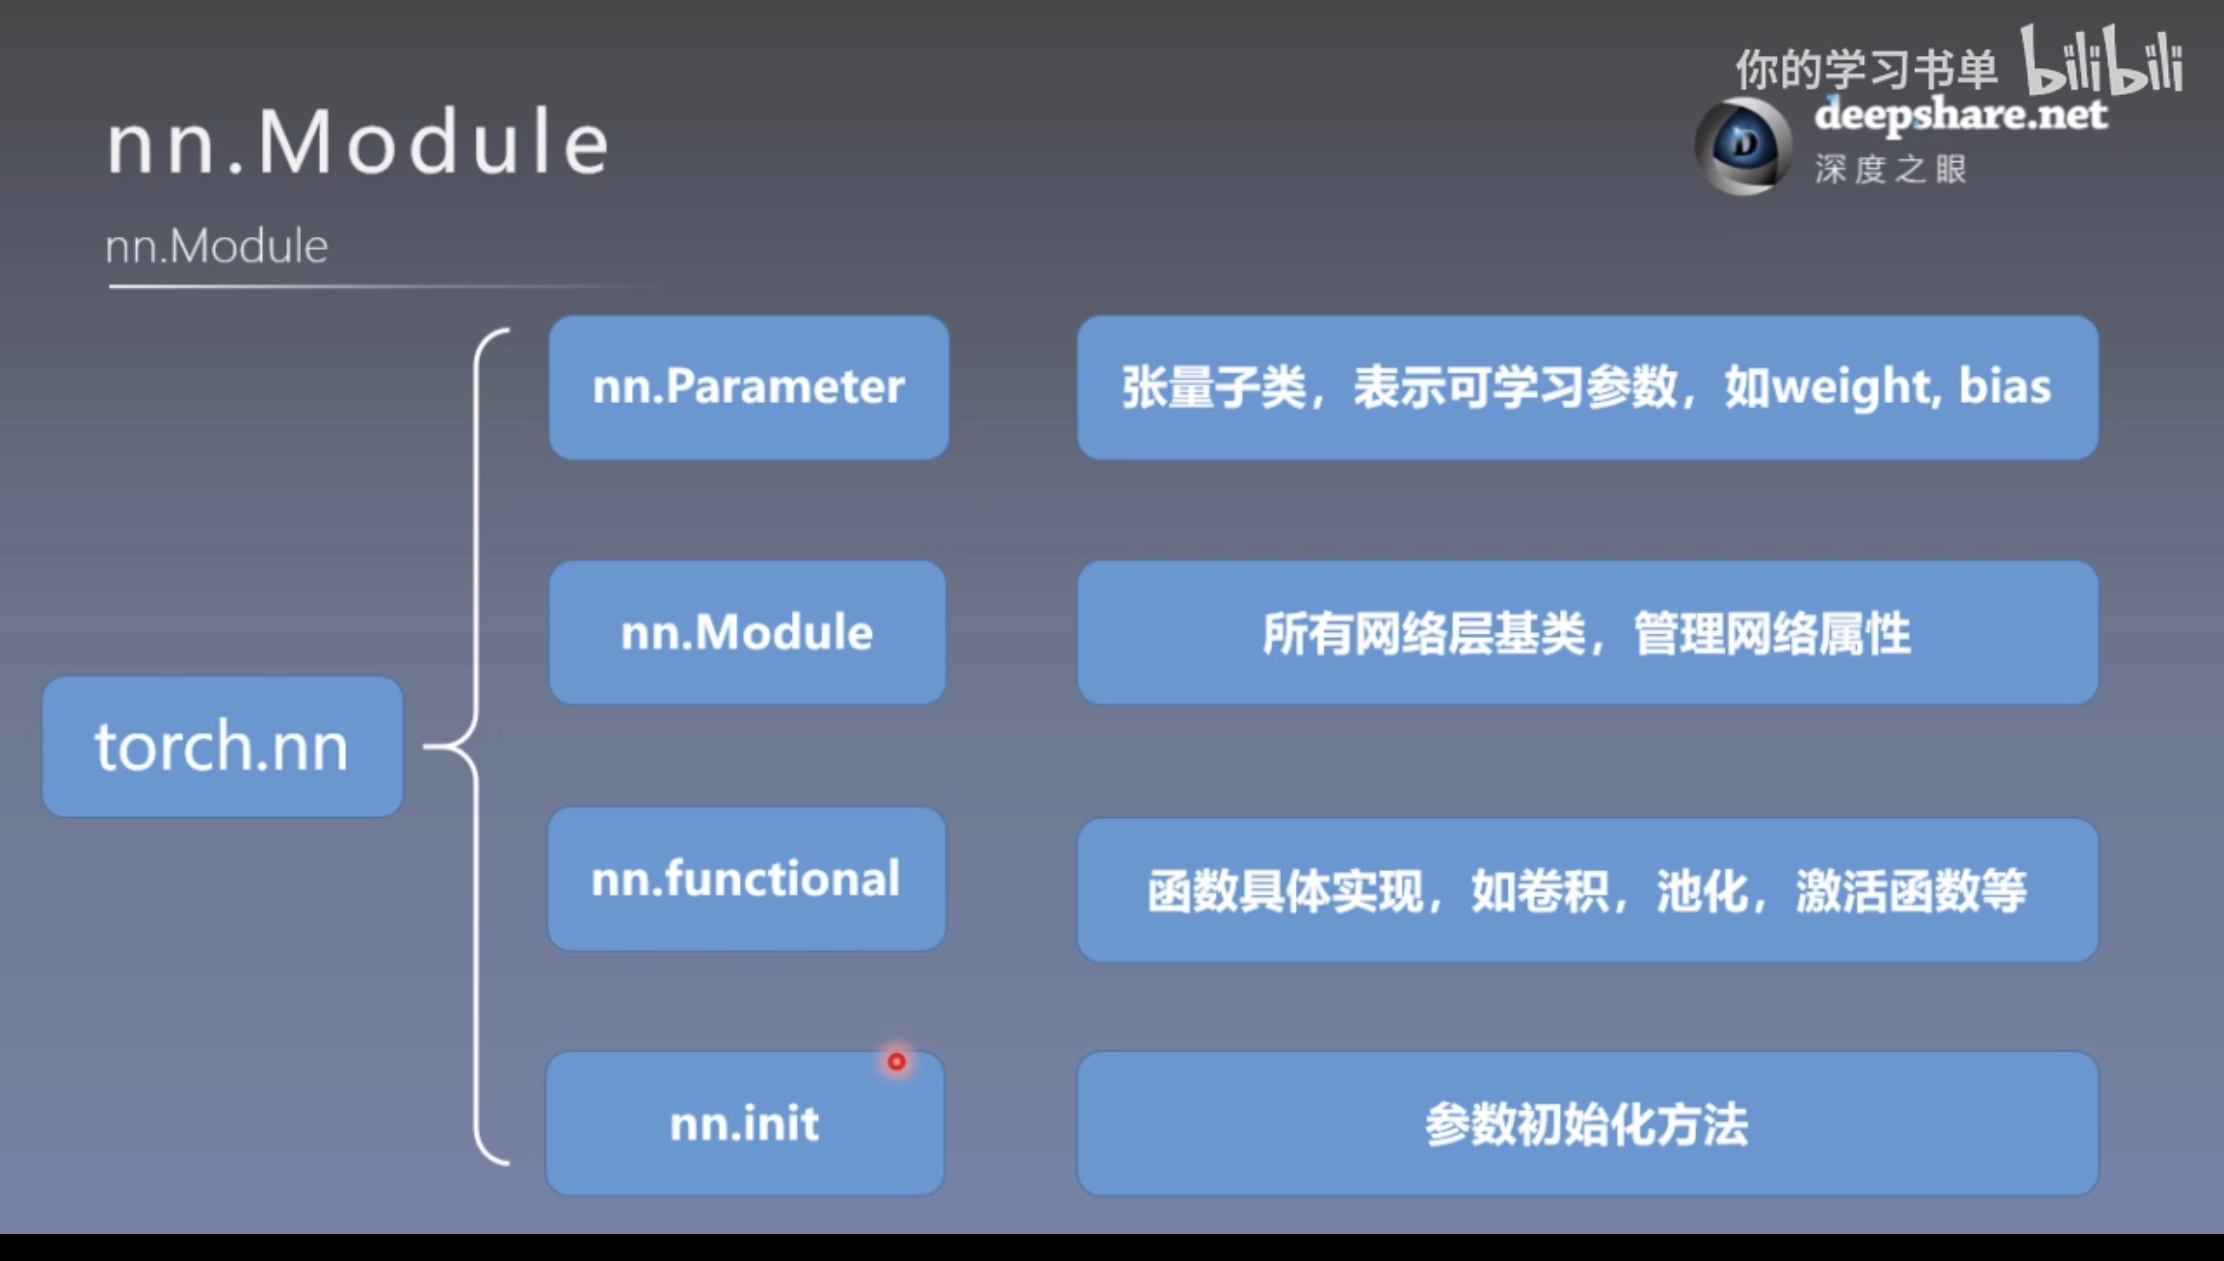

In [ ]:
# nn.module

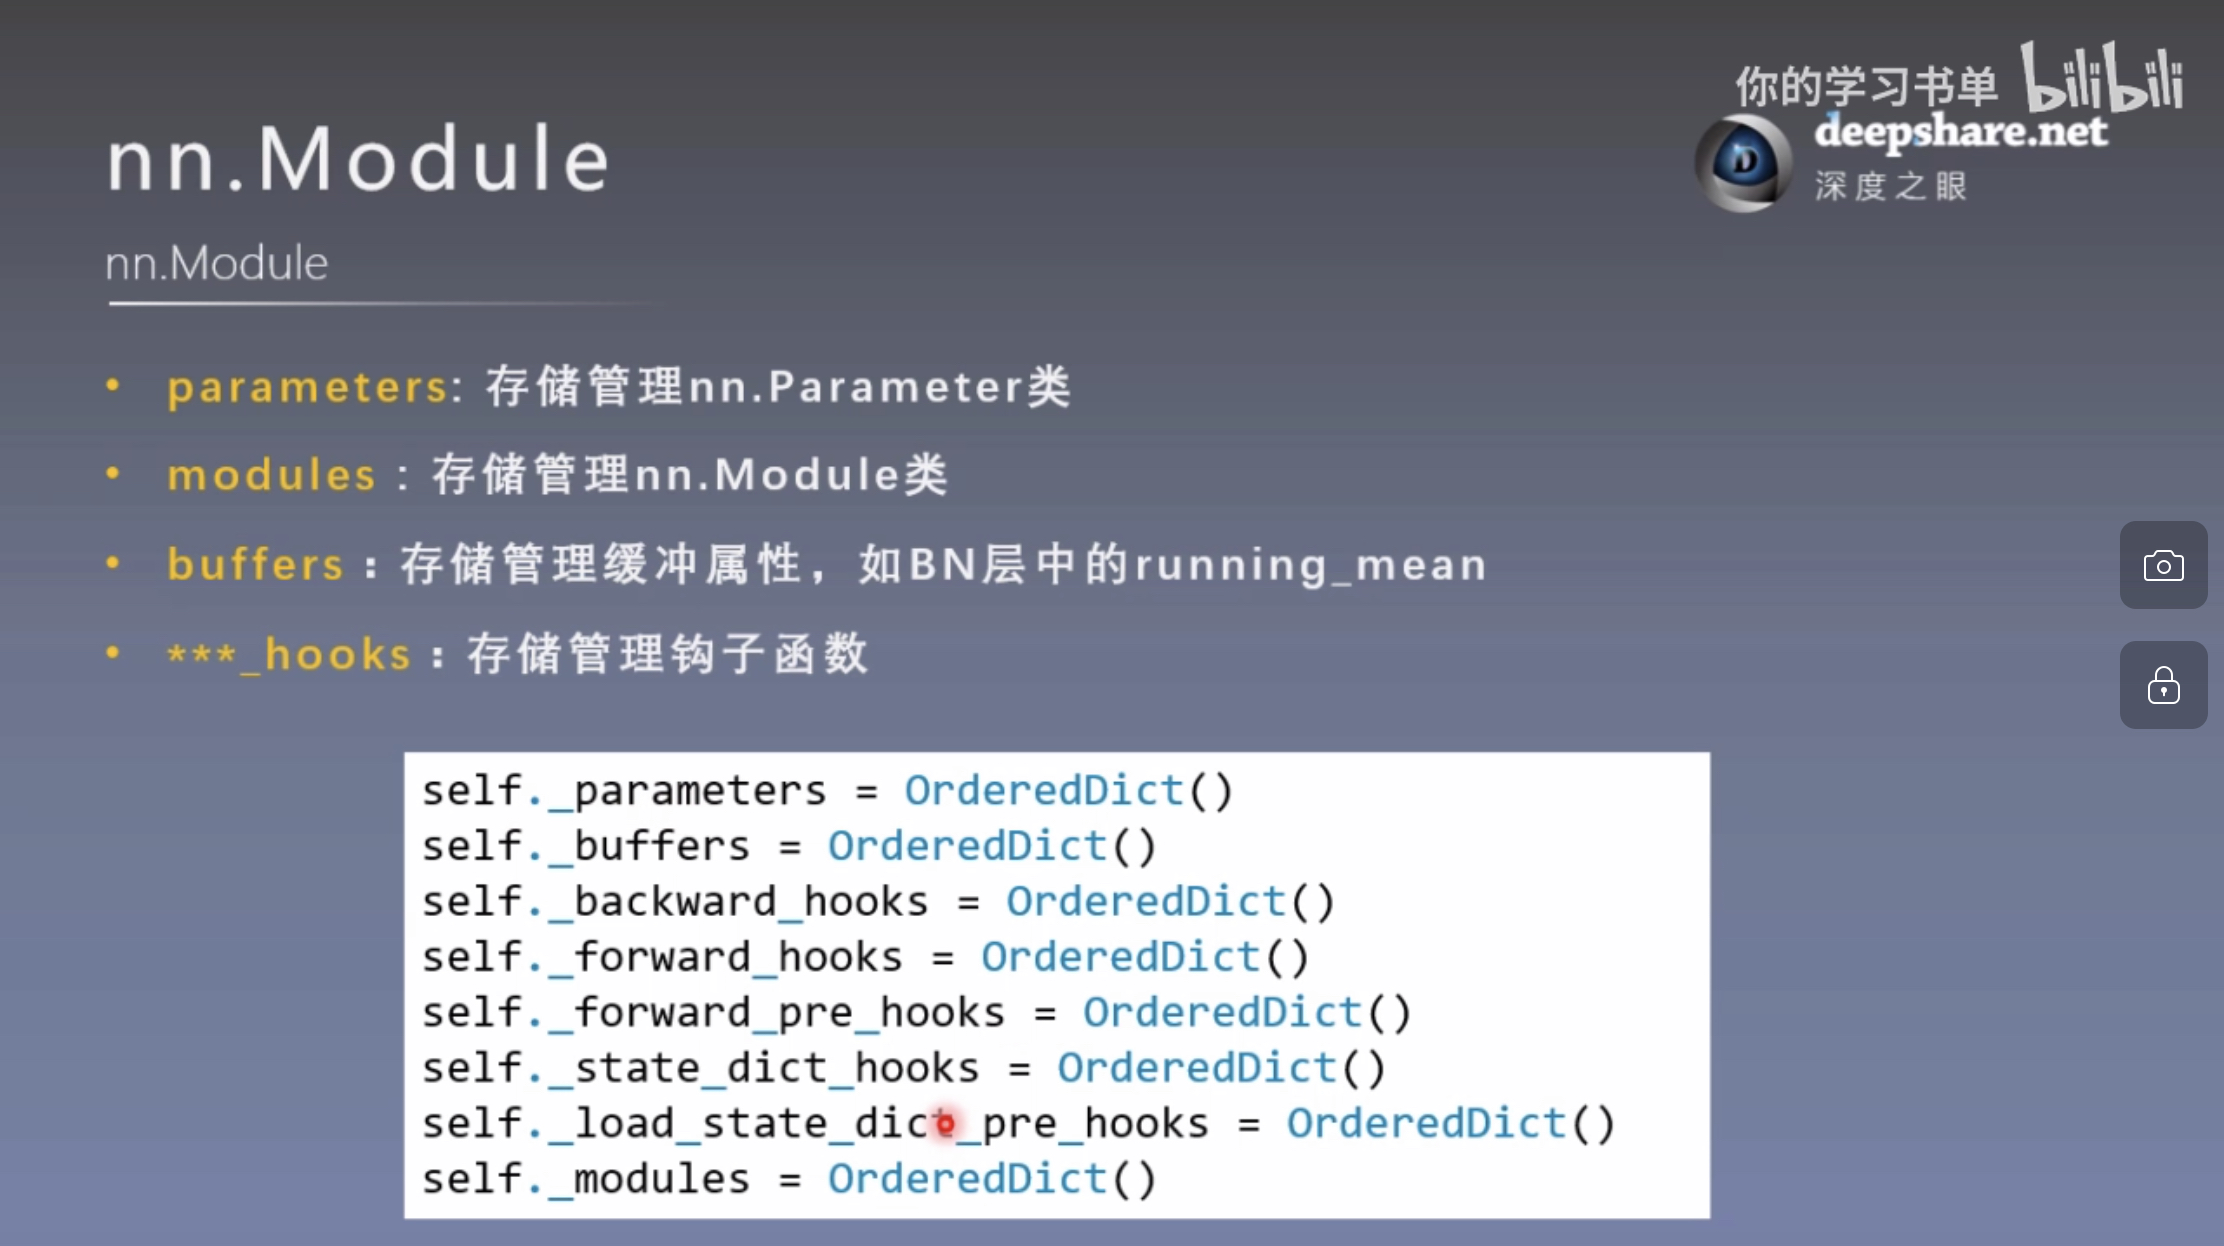

In [ ]:
# For every module, it can include many children module, which is controlled by 8 attributes with OrderedDict type
# We should realize forward(self, x) function.
# module(x) == module.forward(x)

In [ ]:
# Regression

In [99]:
import torch

import matplotlib.pyplot as plt

import torch.nn.functional as F

In [100]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'  

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
print(x)

tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [ 0.

In [101]:
y = x.pow(2) + 0.2 * torch.rand(x.size())
print(y)

tensor([[1.0606],
        [1.1267],
        [0.9649],
        [0.9514],
        [0.9748],
        [0.8564],
        [0.9340],
        [0.7617],
        [0.8597],
        [0.7842],
        [0.7901],
        [0.6872],
        [0.7353],
        [0.5953],
        [0.5646],
        [0.5553],
        [0.5797],
        [0.6028],
        [0.5415],
        [0.4454],
        [0.4675],
        [0.4410],
        [0.4078],
        [0.4293],
        [0.4395],
        [0.3904],
        [0.3269],
        [0.3575],
        [0.3113],
        [0.3196],
        [0.2075],
        [0.2930],
        [0.2463],
        [0.1984],
        [0.2155],
        [0.1413],
        [0.0793],
        [0.2280],
        [0.0682],
        [0.2054],
        [0.1959],
        [0.1296],
        [0.1427],
        [0.0224],
        [0.2039],
        [0.1021],
        [0.1567],
        [0.0843],
        [0.0594],
        [0.0663],
        [0.0786],
        [0.0104],
        [0.1493],
        [0.0101],
        [0.1218],
        [0

torch.Size([100, 1])


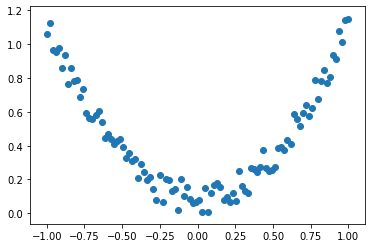

In [102]:
print(x.size())
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [103]:
class MyNet(torch.nn.Module):
    
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_output):
       
        super(MyNet, self).__init__()
        
        self.layer1 = torch.nn.Linear(n_feature, n_hidden1) # 1 * 10
        
        self.layer2 = torch.nn.Linear(n_hidden1, n_hidden2) # 10 * 10
        
        self.predict = torch.nn.Linear(n_hidden2, n_output) # 10 * 1
    
    
    def forward(self, x):
        
        x = F.relu(self.layer1(x))
        
        x = F.relu(self.layer2(x))
        
        x = self.predict(x)
        
        return x
    

In [104]:
RegressionNet = MyNet(n_feature=1, n_hidden1=10, n_hidden2=10, n_output=1)
RegressionNet = RegressionNet.to(device)
print(RegressionNet.parameters)

# bias true: attach bias value

<bound method Module.parameters of MyNet(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)>


In [109]:
optimizer = torch.optim.Adam(RegressionNet
                            .parameters(), lr=0.005)
loss_func = torch.nn.MSELoss()

In [110]:
plt.ion()
plt.show()

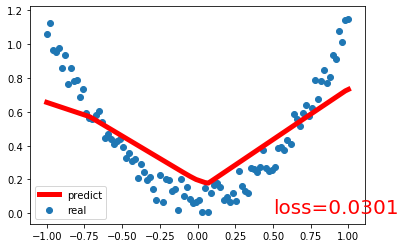

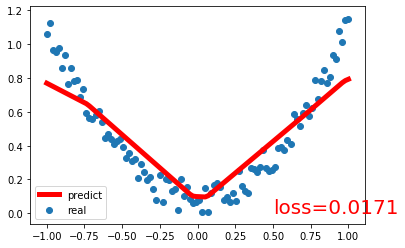

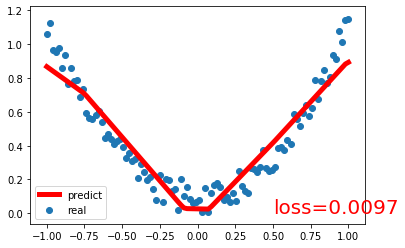

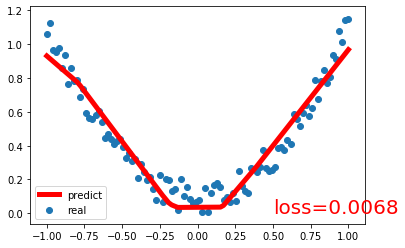

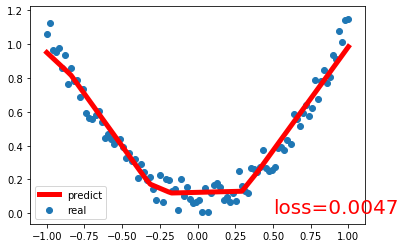

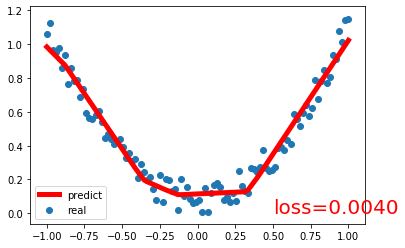

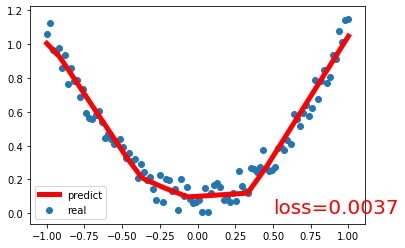

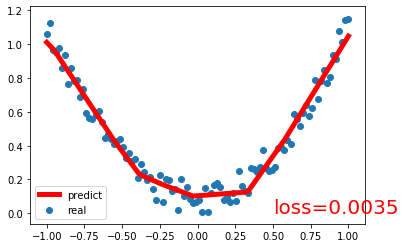

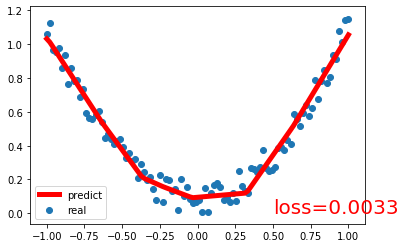

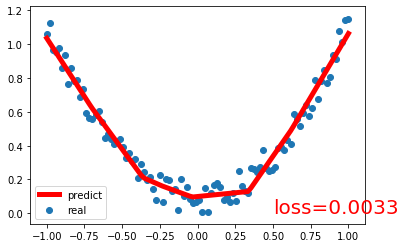

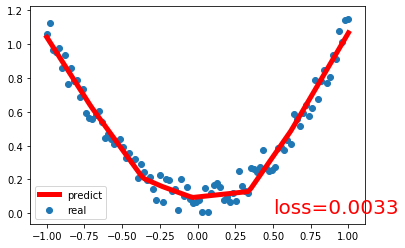

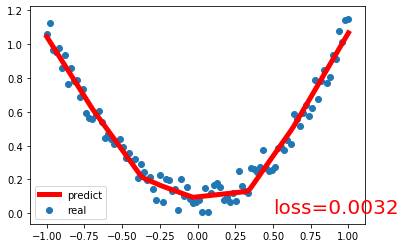

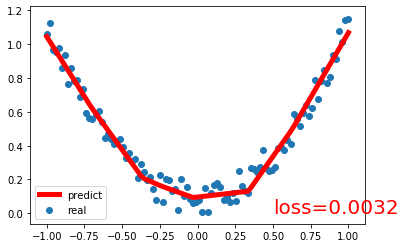

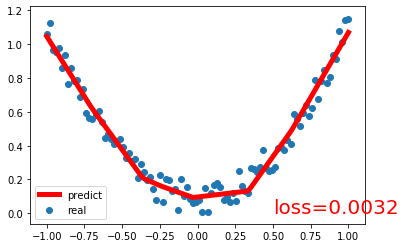

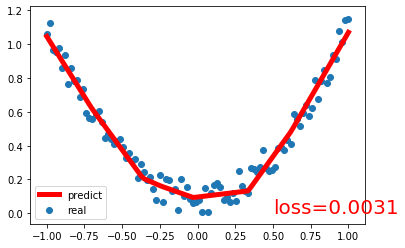

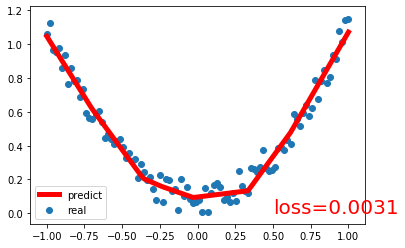

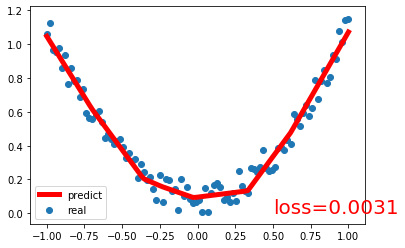

In [ ]:
for i in range(200):
    
    inputs = torch.autograd.Variable(x)
    inputs = inputs.to(device)
    target = torch.autograd.Variable(y)
    target = target.to(device)
    output = RegressionNet(inputs)
    # output = RegressionNet.forward(inputs)
    loss = loss_func(output, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i % 10 == 0:
        plt.cla() # Clear axis即清除当前图形中的当前活动轴。其他轴不受影响。
        plt.scatter(inputs.to('cpu').data.numpy(), target.to('cpu').data.numpy(), label='real')      
        plt.plot(inputs.to('cpu').data.numpy(), output.to('cpu').data.numpy(), 'r-', lw=5, label='predict')
        plt.text(0.5, 0, 'loss=%.4f' % loss.to('cpu').data.numpy(), fontdict={'size': 20, 'color': 'red'}) 
        plt.legend()
        plt.pause(0.1)
        
        